In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import * 
from sklearn.linear_model import LinearRegression

In [5]:
Df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv')

In [6]:
Df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [53]:
df.dtypes

age           int32
sex          object
bmi         float64
children      int64
smoker      float64
region       object
charges     float64
dtype: object

In [7]:
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
Df.columns = headers

In [8]:
Df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [21]:
df.replace('?', np.nan, inplace = True)

In [22]:
Df.head(6)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


In [18]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [26]:
Df.isnull().sum()
# Df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
#import from dvice 
df=pd.read_csv('Medical_insurance.csv')

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [14]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [49]:
# smoker is a categorical attribute, replace with most frequent entry
# is_smoker = df['smoker'].value_counts().idxmax()
# df["smoker"].replace(np.nan, is_smoker, inplace=True)

# # age is a continuous variable, replace with mean age
# mean_age = df['age'].astype('float').mean(axis=0)
# df["age"].replace(np.nan, mean_age, inplace=True)

# # Update data types
# df[["age","smoker"]] = df[["age","smoker"]].astype("int")
# is_smoker = df['smoker'].value_counts().idxmax()
# df["smoker"].replace(np.nan, is_smoker, inplace=True)

# Map 'yes' to 1 and 'no' to 0
df["smoker"] = df["smoker"].map({'yes': 1, 'no': 0})

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age", "smoker"]] = df[["age", "smoker"]].astype("int")

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

(0.0, 66902.8557155)

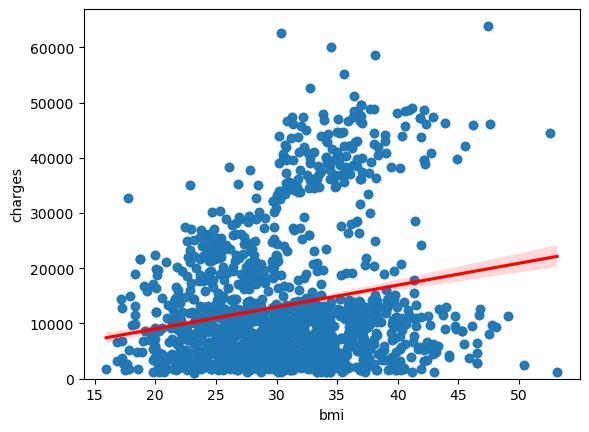

In [29]:
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

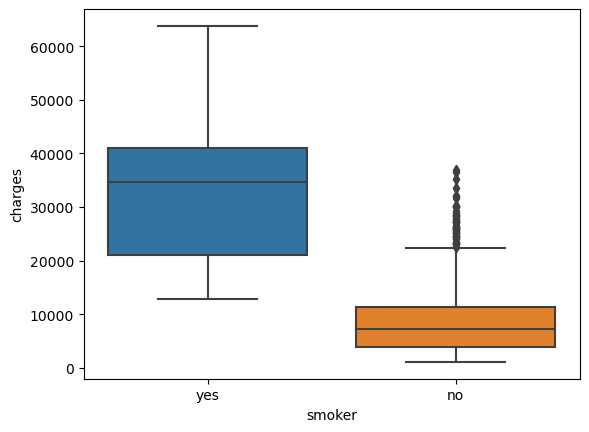

In [31]:
sns.boxplot(x="smoker", y="charges", data=df)

In [32]:
print(df.corr())

               age       bmi  children   charges
age       1.000000  0.113048  0.037574  0.298624
bmi       0.113048  1.000000 -0.001492  0.199846
children  0.037574 -0.001492  1.000000  0.066442
charges   0.298624  0.199846  0.066442  1.000000


C:\Users\mtaha\AppData\Local\Temp\ipykernel_11880\4212406737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [40]:
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))

0.6221791718835359
